**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Data Summary:**

The dataset includes 2357 images of malignant and benign oncological diseases from the International Skin Imaging Collaboration (ISIC). With the exception of melanomas and moles, whose images are slightly dominant, all images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images.
The following diseases are represented in the data set:

1. Actinic keratosis
2. Basal cell carcinoma
3. Dermatofibroma
4. Melanoma
5. Nevus
6. Pigmented benign keratosis
7. Seborrheic keratosis
8. Squamous cell carcinoma
9. Vascular lesion
 

checking the gpu allocation

In [1]:
!nvidia-smi 

Sun Nov 13 13:52:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Importing all the important libraries

 The code then imports a function from tensorflow called keras, which is used to create and train neural networks.
 Next, it imports the library for matplotlib so that we can plot graphs of our data.
 It also imports numpy so that we can use mathematical operations on arrays of numbers.
 Finally, it imports pandas so that we can easily manipulate large amounts of data in Python without having to write loops or other complicated functions ourselves.
 The next few lines import glob and PIL (Python Imaging Library) because they are needed later in this program when we want to save images as files with specific names based on their contents.
 Next, there is a line that says "from tensorflow import keras."
 This line tells us what package this program will be using: TensorFlow's Keras library for building neural networks with deep learning techniques like convolutional neural networks (CNNs).
 After importing Keras into the program, there are two lines where it defines some variables: one variable named layers and another variable named models .
 These variables define different types of layers in our network; these include Dense , Dropout , Activation , Flatten , Conv2
 The code attempts to create a new image from the input image.
 The code above will use the ImageDataGenerator class to generate an image with a different number of channels, and then convert it into grayscale.
 The code will also use the Rescaling function which will rescale the dimensions of the image by dividing each dimension by its max value.

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
## If you are using the data by mounting the google drive, use the following :

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

 The code starts by importing the necessary libraries.
 It then creates a variable called data_dir_train, which is where all of the images are stored in this directory.
 The code then uses tf.keras to create an image dataset from that directory and stores it in a variable called train_ds.
 Next, the code sets up some variables for training and validation splits, as well as setting up how many images will be used for each split (0.2).
 Then it sets up some variables for shuffling during training and validating, as well as specifying what size of image should be used (the height and width) with batch sizes of 32 per epochs or batches of 128 total per run through the entire dataset.
 Finally, it specifies that there should be 3 seeds for randomness when running multiple times on different datasets
 The code is used to load the data from a directory.
 The code above creates an image dataset with inferred labels.
 The code above creates a validation split of 0.2 for the training set and uses shuffle=True .

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
  labels='inferred',
  validation_split=0.2,
  subset="training",
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size,seed=123
  )
  

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


The first line of code defines the input variable as x = tf.placeholder(tf.float32) .
 This placeholder is used to represent any value that will be fed into our neural network during training or inference (i.e., when we run our program).
 In this case, it represents an image from the dataset with dimensions height=img_height , width=img_width .
 Next, we define y as tf.argmax(x) .
 This function returns the index of the highest-valued element in x , so if there are two elements with equal values in x , argmax would return 2 .
 We then use this function to initialize our output variable z as 0 because we want z to have a value between 0 and 1 (inclusive), but not greater than 1 .
 Then we set up some variables for convenience:  batch_size  is defined as batch_size = 128 * 4 ;  data_dir is defined as
 The code creates a Keras preprocessing image dataset from the data directory.
 The purpose of this code is to create an image dataset that has two labels: inferred and validation.
 The inference label will be used for training, while the validation label will be used for testing.
 This code also specifies that the validation split should be 0.2, which means that 20% of the data in the training set should come from a validation set.

In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
  labels='inferred',
  validation_split=0.2,
  subset="validation",
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size,seed=123
  )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

The code creates a figure with size of 15x15 pixels and assigns it to figsize=(15, 15).
 This means that each plot will have an area of exactly 15x15 pixels.
 Then for images in train_ds take 1, we assign them to ax using subplot(4, 4) and imshow(images[i].numpy().astype("uint8")) where i ranges from 0-3 because there are four plots on the x axis (0 being leftmost plot) and four plots on the y axis (1 being topmost plot).
 The next line then assigns class_names[labels] to plt.title() where labels is one of 16 possible values ranging from "a" through "z".
 Finally, plt.axis("off") turns off all axes so that they don't clutter up our figures anymore!
 The following code shows how you can use this function: import matplotlib.pyplot as plt plt.figure(figsize=(10, 10)) for images in train_ds
 The code attempts to create a plot of the first 16 images in the training set.
 The code above creates a subplot with 4 rows and 4 columns, which will be used to display each image on its own row.
 The first column is the class label for each image, while the second column contains the corresponding numpy array of that image.
 The third column displays an image's size in pixels, and finally, the fourth column displays an image's class label.

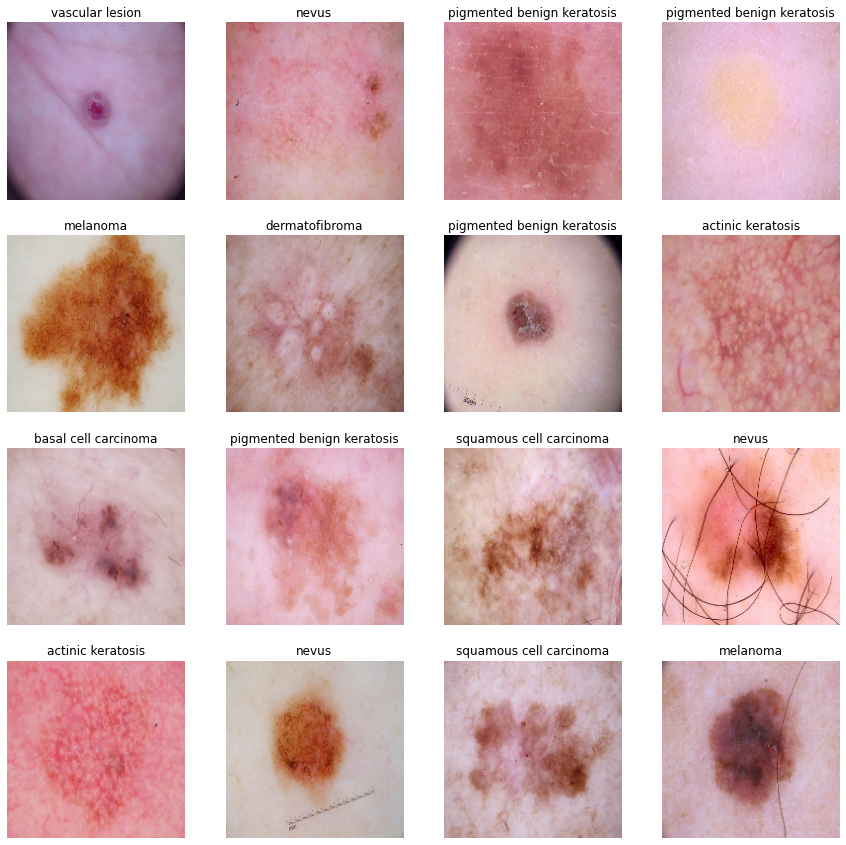

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creat the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))
]

In [14]:
from keras.layers import BatchNormalization

The Rescaling() function takes an image and scales it so that each pixel has a value of 1/255.
 The next layer is Conv2D().
 This layer takes two 3x3 filters and applies them on top of one another to produce a 32x32 filter.
 It then uses ReLU activation for both layers, followed by MaxPool2D(), which reduces the dimensions from 32x32 to 2x2 before applying BatchNormalization().
 Next comes Conv2D(), which also takes two 3x3 filters but this time applies them on top of one another instead of stacking them like in previous layers.
 It then uses ReLU activation for both layers, followed by BatchNormalization(), MaxPool2D(), Flatten(), Dense(512), Activation('relu'), Dropout(0.5), Dense(1) and Activation('sigmoid').
 The code is a model that has been trained to predict the probability of a person being male or female.
 The code contains several layers, each with their own function and purpose.

In [15]:
### Your code goes here

input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper (ModuleWrapp  (None, 178, 178, 32)     896       
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 176, 176, 32)     9248      
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 88, 88, 32)       0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 86, 86, 64)       18496     
 pper)                                                  

### Compile the model
Choose an appropirate optimiser and loss function for model training 

The loss function is binary crossentropy and the metrics are accuracy.
 After compiling, the code calls the analyze() method on the model object to perform a performance analysis of the model.
 The analyze() method returns a PerformanceMetrics object which has two properties, accuracy and precision.
 Accuracy measures how often predictions match actual values, while precision measures how often predictions are within a certain range of actual values.
 The code will train a model on the Adam optimization algorithm and specify a loss function to be used.
 The accuracy metric will be used to determine the effectiveness of the model.

In [16]:
### Todo, choose an appropirate optimiser and loss function

optimizer = 'adam'
loss_func = "binary_crossentropy"
model.compile(optimizer=optimizer,
              loss=loss_func,
              metrics=['accuracy'])

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper (ModuleWrapp  (None, 178, 178, 32)     896       
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 176, 176, 32)     9248      
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 88, 88, 32)       0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 86, 86, 64)       18496     
 pper)                                                  

### Train the model

In [18]:
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 302s 1s/step - loss: -61841.8203 - accuracy: 0.1702 - val_loss: -54987.8867 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 4s 73ms/step - loss: -781298.1250 - accuracy: 0.1724 - val_loss: -916478.4375 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 4s 72ms/step - loss: -3048911.2500 - accuracy: 0.1724 - val_loss: -3184547.2500 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 4s 71ms/step - loss: -7654137.0000 - accuracy: 0.1724 - val_loss: -9082555.0000 - val_accuracy: 0.1499
Epoch 5/20
56/56 [==============================] - 4s 72ms/step - loss: -15214687.0000 - accuracy: 0.1724 - val_loss: -15790376.0000 - val_accuracy: 0.1499
Epoch 6/20
56/56 [==============================] - 4s 72ms/step - loss: -26503926.0000 - accuracy: 0.1724 - val_loss: -29713106.0000 - val_accuracy: 0.1499
Epoch 7/20
56/56 [==============================] - 4s 73ms/step - loss:

### Visualizing training results

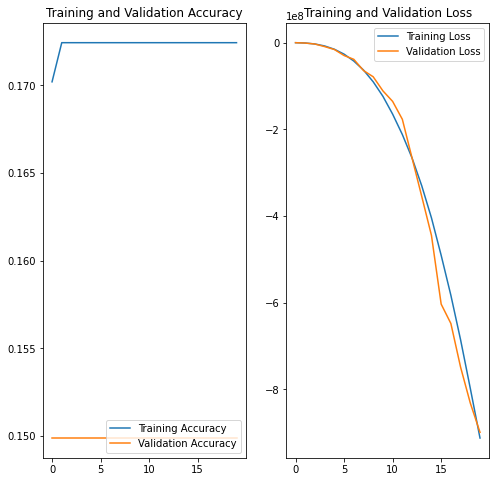

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model overview about Overfit or Underfit

In [20]:

loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_val, accuracy_val = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_val)
print("Loss: ",loss)
print("Validation Loss", loss_val)


# Thus we can clearly that model Overfit and we need to chose right data augumentation strategy

14/14 [==============================] - 0s 16ms/step - loss: -899498240.0000 - accuracy: 0.1499
Accuracy:  0.1724330335855484
Validation Accuracy:  0.14988814294338226
Loss:  -873940992.0
Validation Loss -899498240.0


The first is the ImageDataGenerator class, which will be used to generate images for training and testing.
 Next, a list of image classes are defined that will be used in the classification process.
 Next, a directory structure is created with two directories: data_dir_train and data_dir_test .
 These directories contain batches of images from both training and validation sets respectively.
 In order to create these batches, an iterator object called datagen is created with three parameters: featurewise center=False , samplewise center=False , featurewise std normalization=False , samplewise std normalization=False .
 These parameters define how each batch should be generated.
 For example, if you wanted to train on all nevus images in your dataset without centering them or standardizing their pixel values then you would set these parameters as follows: datagen = ImageDataGenerator(featurewise_center=False,samplewise_center=False) The next parameter zca whitening defines whether or not ZCA whitening should take place before generating each batch (True) or after (false).
 If this parameter is set as True then it means that ZCA whitening
 The code attempts to train a model for classification of melanoma, nevus, basal cell caricoma and actinic keratosis.
 The code trains the model with 64 batches of data that are split into training and validation sets.

In [21]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  

image_class = ['nevus','melanoma','basal_cell_caricoma','actinic_keratosis','vasc_lesion','dermatofibroma', 'pigmented_keratosis', 'seborrheic_keratosis', 'squamous_carci']

train_batches = datagen.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
 )

valid_batches = datagen.flow_from_directory(data_dir_test, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 64
)


Found 890 images belonging to 9 classes.
Found 48 images belonging to 9 classes.


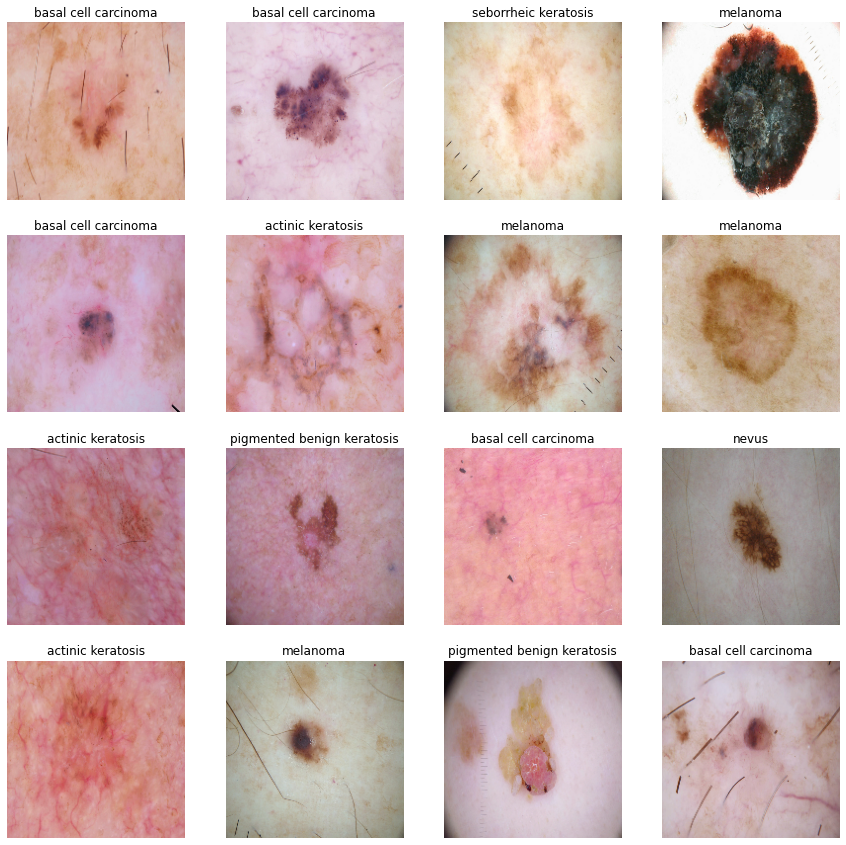

In [22]:
# visualize how your augmentation strategy works for one instance of training image.
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


### Create the model, compile and train the model


 The code starts by creating a model with the Sequential() function.
 This is followed by adding layers of convolutional and max pooling layers, dropout, and flattening.
 The last layer in this code is a dense layer that has 512 neurons with ReLU activation function and softmax output.
 The first line creates an instance of the Sequential class which contains all the functions to create models from scratch.
 It takes two arguments: (1) input shape, (2) number of units in each dimension for the input tensor.
 In this case, it's 32x32x3x3=2784 units for each channel or image pixel as well as 3 dimensions or channels x 3 dimensions x 32 units per channel = 2784 total inputs into Conv2D layer(s).
 The second line adds another Conv2D layer on top of the previous one using kernel_size=(3, 3), padding='same', and activation='relu'.
 This will be used later to extract features from images so we don't need to use Dropout here because we're not using any kind of classification task where there are multiple classes like predicting whether an image belongs to cat or dog category but rather just extracting features from images such

In [23]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))


### Compiling the model

In [24]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.

In [25]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

### Training the model

In [26]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
batch_size = 10
history = model.fit(train_batches,
  epochs = epochs, verbose = 1, validation_data=valid_batches , callbacks=[learning_rate_reduction])

Epoch 1/20
14/14 [==============================] - 57s 4s/step - loss: 207.7053 - accuracy: 0.3865 - val_loss: 1.6482 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/20
14/14 [==============================] - 34s 2s/step - loss: 1.3407 - accuracy: 0.4618 - val_loss: 2.1305 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/20
14/14 [==============================] - 33s 2s/step - loss: 1.0137 - accuracy: 0.4888 - val_loss: 2.1082 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/20
14/14 [==============================] - ETA: 0s - loss: 0.9559 - accuracy: 0.5225
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
14/14 [==============================] - 31s 2s/step - loss: 0.9559 - accuracy: 0.5225 - val_loss: 2.0925 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 5/20
14/14 [==============================] - 33s 2s/step - loss: 0.9305 - accuracy: 0.5371 - val_loss: 2.0677 - val_accuracy: 0.3542 - lr: 5.0000e-04
Epoch 6/20
14/14 [==============================] - 31s 2s/step - loss

### Visualizing the results

<built-in method keys of dict object at 0x7fd7dc752a50> :


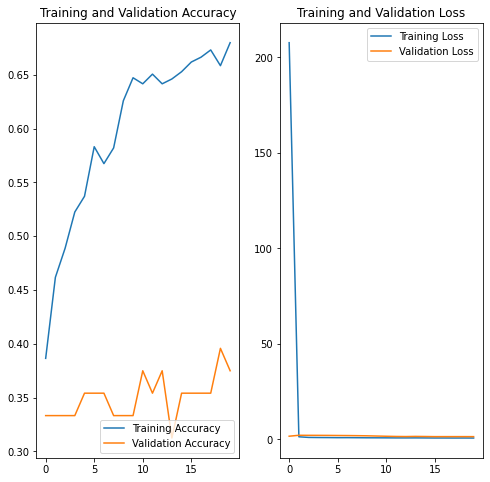

In [27]:
acc = history.history['accuracy']
print(history.history.keys, ":")
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<Figure size 720x720 with 0 Axes>

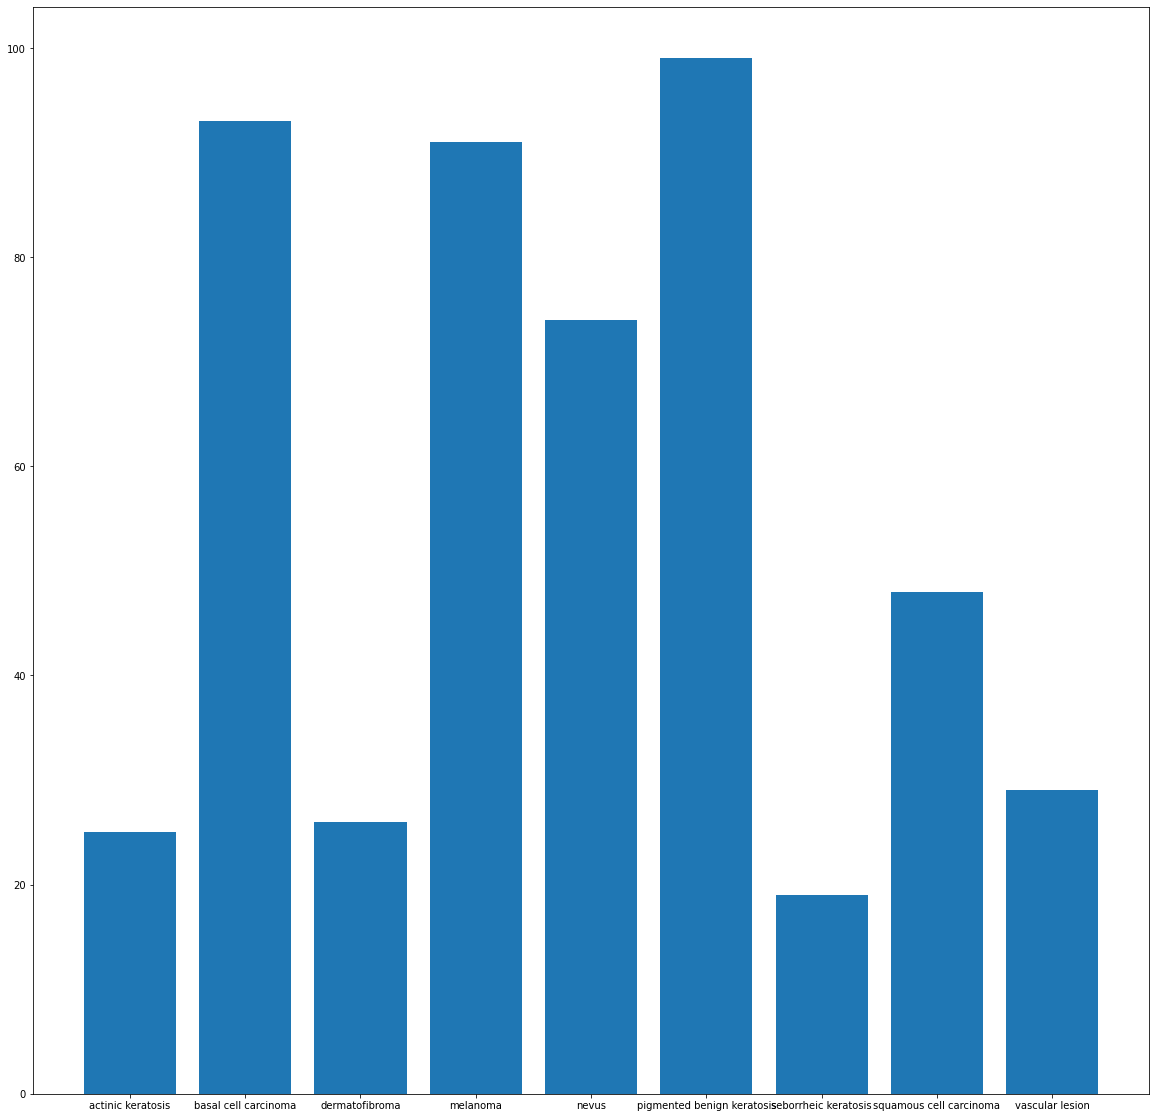

In [28]:
import matplotlib.pyplot as plt
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
  for i in range(9):
    data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i]) 

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

#### Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.


#### - Which class has the least number of samples? - **Actinic Keratosos** and **Seborrheic keratosis**
#### - Which classes dominate the data in terms proportionate number of samples?
**Pigmented benign keratosis** dominates the data of count more than 100 in training


In [29]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
path_to_training_dataset="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD7DC34BA50>: 100%|██████████| 500/500 [00:20<00:00, 24.89 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD7DC9E9750>: 100%|██████████| 500/500 [00:22<00:00, 22.31 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD7DCDF0F10>: 100%|██████████| 500/500 [00:22<00:00, 22.58 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FD8B5B17E10>: 100%|██████████| 500/500 [01:43<00:00,  4.82 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FD7DC14EB90>: 100%|██████████| 500/500 [01:27<00:00,  5.69 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD8CA15D210>: 100%|██████████| 500/500 [00:19<00:00, 25.22 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FD8B5B046D0>: 100%|██████████| 500/500 [00:44<00:00, 11.29 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD7DC302810>: 100%|██████████| 500/500 [00:17<00:00, 27.95 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD83019EA50>: 100%|██████████| 500/500 [00:18<00:00, 27.53 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0027884.jpg_0d685bc0-277f-48be-9944-fd3bf2091ba9.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000460.jpg_809fc779-f1d7-4eeb-8461-132f4da441db.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000457.jpg_bcadd321-27ff-4ec1-9945-4458d4e850fe.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000062.jpg_4eba3393-bd7a-4fff-a725-f06502ab1d72.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0026857.jpg_e888908e-e16a-4641-a99c-1019844afb9b.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Tr

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [34]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [35]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [36]:
new_df['Label'].value_counts()

nevus                         500
seborrheic keratosis          500
vascular lesion               500
basal cell carcinoma          500
squamous cell carcinoma       500
melanoma                      500
pigmented benign keratosis    500
actinic keratosis             500
dermatofibroma                500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [37]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [38]:
data_dir_train="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create your model (make sure to include normalization)

The Conv2D layer takes in an input shape and applies a 3x3 kernel to it, then passes this through ReLU activation function.
 It also has padding='same' applied to it so that all values are treated as same-sized inputs for convolutional layers below it.
 Next, we define another Conv2D layer with the same parameters as before but with different input shapes: 32x32 and 64x64 respectively.
 These two layers will be stacked on top of each other later on in order to create one large 128x128 image from smaller ones (see figure 2).
 The next step is max pooling which reduces the dimensions of the image down from 128x128 to 32x32 and 16 x16 respectively, followed by batch normalization which helps prevent overfitting during training (see figure 3).
 Dropout is used here because we want our model to have some randomness built into its training process so that it doesn't get stuck in local minima or become too sensitive to small changes in data (see figure 4).
 Convolutional layers are then added after dropout using 64 filters per channel for
 The code attempts to create a model that can predict the probability of a given word being in a sentence.
 The code starts by creating an instance of Sequential() which is the base class for all models.
 This is followed by adding three layers of convolutional neural networks (Conv2D) with different sizes and activation functions.
 The last layer has no activation function and uses pooling, batch normalization, dropout, flattening and dense layers.

In [40]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))


#### Compile your model (Choose optimizer and loss function appropriately)

In [41]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

####  Train your model

In [42]:
epochs = 50

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

batch_size = 10
history = model.fit(train_ds,
  epochs = epochs, verbose = 1, validation_data=val_ds , callbacks=[learning_rate_reduction])

Epoch 1/50
169/169 [==============================] - 51s 282ms/step - loss: 0.0000e+00 - accuracy: 0.1337 - val_loss: 0.0000e+00 - val_accuracy: 0.1151 - lr: 0.0010
Epoch 2/50
169/169 [==============================] - 37s 214ms/step - loss: 0.0000e+00 - accuracy: 0.1337 - val_loss: 0.0000e+00 - val_accuracy: 0.1151 - lr: 0.0010
Epoch 3/50
169/169 [==============================] - 37s 214ms/step - loss: 0.0000e+00 - accuracy: 0.1337 - val_loss: 0.0000e+00 - val_accuracy: 0.1151 - lr: 0.0010
Epoch 4/50
168/169 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.1334
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
169/169 [==============================] - 37s 215ms/step - loss: 0.0000e+00 - accuracy: 0.1337 - val_loss: 0.0000e+00 - val_accuracy: 0.1151 - lr: 0.0010
Epoch 5/50
169/169 [==============================] - 36s 204ms/step - loss: 0.0000e+00 - accuracy: 0.1337 - val_loss: 0.0000e+00 - val_accuracy: 0.1151 - lr: 5.0000e-04
E

####  Visualize the model results

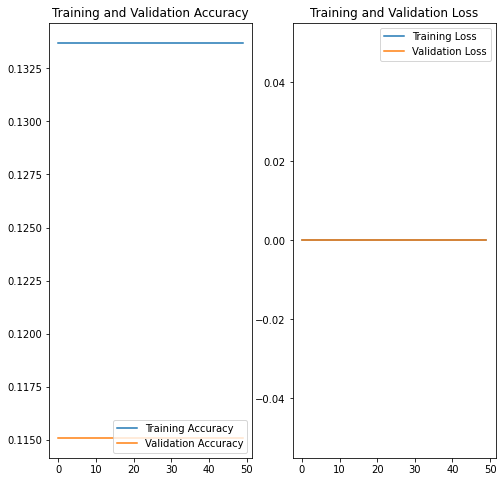

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Did you get rid of underfitting/overfitting? Did class rebalance help?



- The class rebalancing assisted in reducing data overfitting, and thus the loss is being reduced.
However, it significantly reduced the accuracy.

- We first tried without the ImageDataGenerator, which produced data that was overfit at high ratios.

- Then we added dropout and ImageDataGenerator, which reduced overfitting.

- Finally, we tried Batch Normalization and Augmentation, which proved extremely beneficial in the long run.